# **Bullet Train Hackathon**

> A classification problem, focused on predicting overall customer satisfaction.




## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## **Preparing the dataset**

### **Load the dataset**

In [ ]:
train_survey = pd.read_csv("Surveydata_train.csv")
train_travel = pd.read_csv("Traveldata_train.csv")

test_survey = pd.read_csv("Surveydata_test.csv")
test_travel = pd.read_csv("Traveldata_test.csv")

sample_submission = pd.read_csv("Sample_Submission.csv")

### **Overview of Data**

In [ ]:
sample_submission.head

<bound method NDFrame.head of              ID  Overall_Experience
0      99900001                   1
1      99900002                   0
2      99900003                   0
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   1
35598  99935599                   0
35599  99935600                   0
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]>

In [ ]:
sample_submission['ID'].nunique()

35602

In [ ]:
train_travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
train_travel.shape

(94379, 9)

In [ ]:
train_travel['ID'].nunique()

94379

In [ ]:
test_travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
test_travel.shape

(35602, 9)

In [ ]:
test_travel['ID'].nunique()

35602

**Training and test dataset travel are the same structure**

In [ ]:
train_survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
train_survey.shape

(94379, 17)

In [ ]:
test_survey.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
test_survey.shape

(35602, 16)

In [ ]:
np.setdiff1d(train_survey.columns, test_survey.columns)

array(['Overall_Experience'], dtype=object)

### **Observations:**

* Travel, training, and test data sets are consistent.
* Survey training has one more column than test: **Overall_Experience**. It is the column to predict.
* The same output shows that we need both **ID** and **Overall_Experience**
* All dataframes appear to be sorted by ID, but will sort to be sure.

### **Combine / Join dataset by ID**

In [ ]:
train = pd.merge(train_travel, train_survey, on='ID')
test = pd.merge(test_travel, test_survey, on='ID')

In [ ]:
train = train.sort_values(by='ID')
test = test.sort_values(by='ID')

In [ ]:
train.shape

(94379, 25)

In [ ]:
test.shape

(35602, 24)

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Summary statistics**

In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
info = train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

**Observation per missing values:**

* There are missing categorical values, will fill with respect to each category.
* Age has inconsistent distribution with 33 missing values, will fill with average age.
* Departure_Delay_in_Mins has 57 missing values and 0 is the median, so will fill with 0.
* Arrival_Delay_in_Mins has 32 missing values, will fill with average.

In [ ]:
!pip install pandas_profiling
!pip install ipywidgets

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
#function to fill missing values as described above
def impute(data):
    # Fill categorical with ''
    cat_fill = train.select_dtypes(include=['object']).columns.tolist()
    data[cat_fill] = data[cat_fill].fillna('')

    # Fill mean values
    mean_fill = ['Age']
    data[mean_fill] = data[mean_fill].fillna(data.mean())

    # Fill median values
    median_fill = ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
    data[median_fill] = data[median_fill].fillna(data.median())
    return data

train = impute(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94379 non-null  object 
 2   Customer_Type            94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_Location     

In [ ]:
test = impute(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  35602 non-null  object 
 12  Catering                 35602 non-null  object 
 13  Platform_Location        35602 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
# Dropping ID column and Seat_Class columns
train.drop(["ID", "Seat_Class"], axis = 1, inplace = True)

## **Data preparation for modeling**

In [ ]:
# Separating the target variable and other variables
X = train.drop(columns = 'Overall_Experience')
Y = train['Overall_Experience']

In [ ]:
features = list(X.columns)

In [ ]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [ ]:
print("Shape of the training set: ", X_train.shape)
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (66065, 94)
Shape of the test set:  (28314, 94)
Percentage of classes in the training set:
1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64
Percentage of classes in the test set:
1    0.548386
0    0.451614
Name: Overall_Experience, dtype: float64


### The classes are roughly balanced

<Axes: >

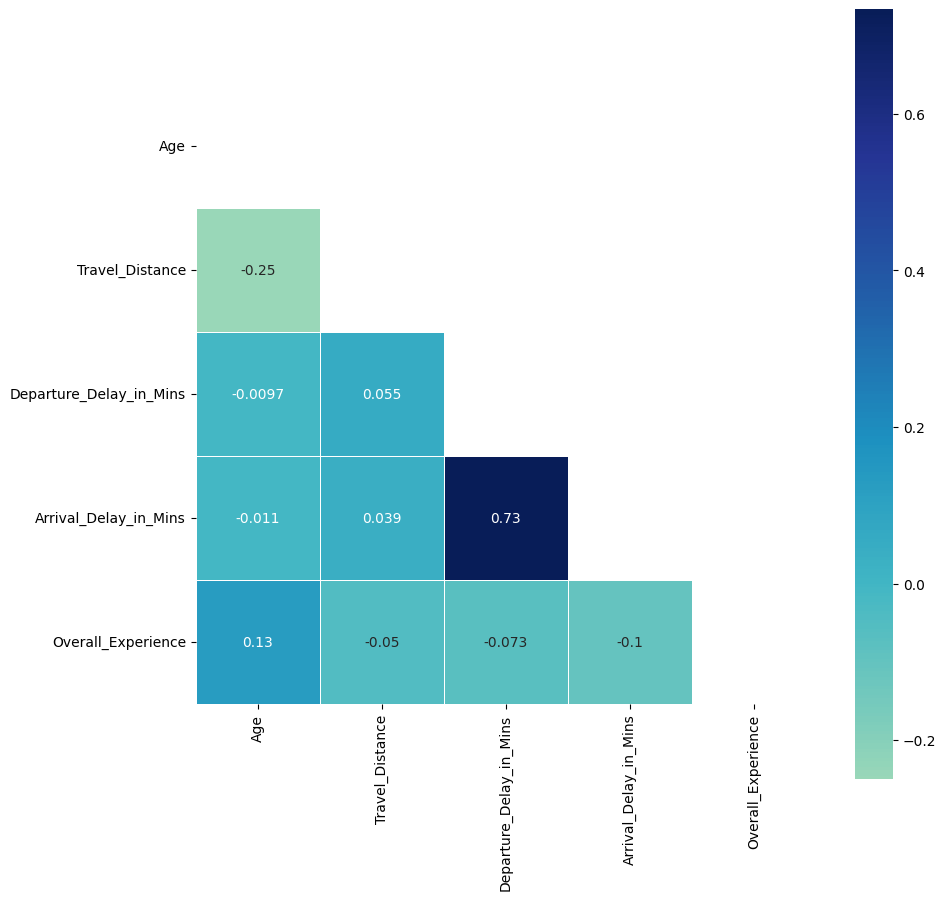

In [ ]:
corr = train.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

## **Building Classification Models**

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

### **Decision Tree**

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



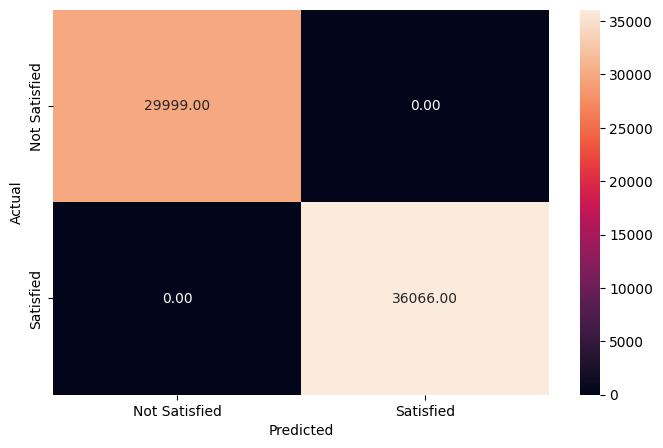

In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

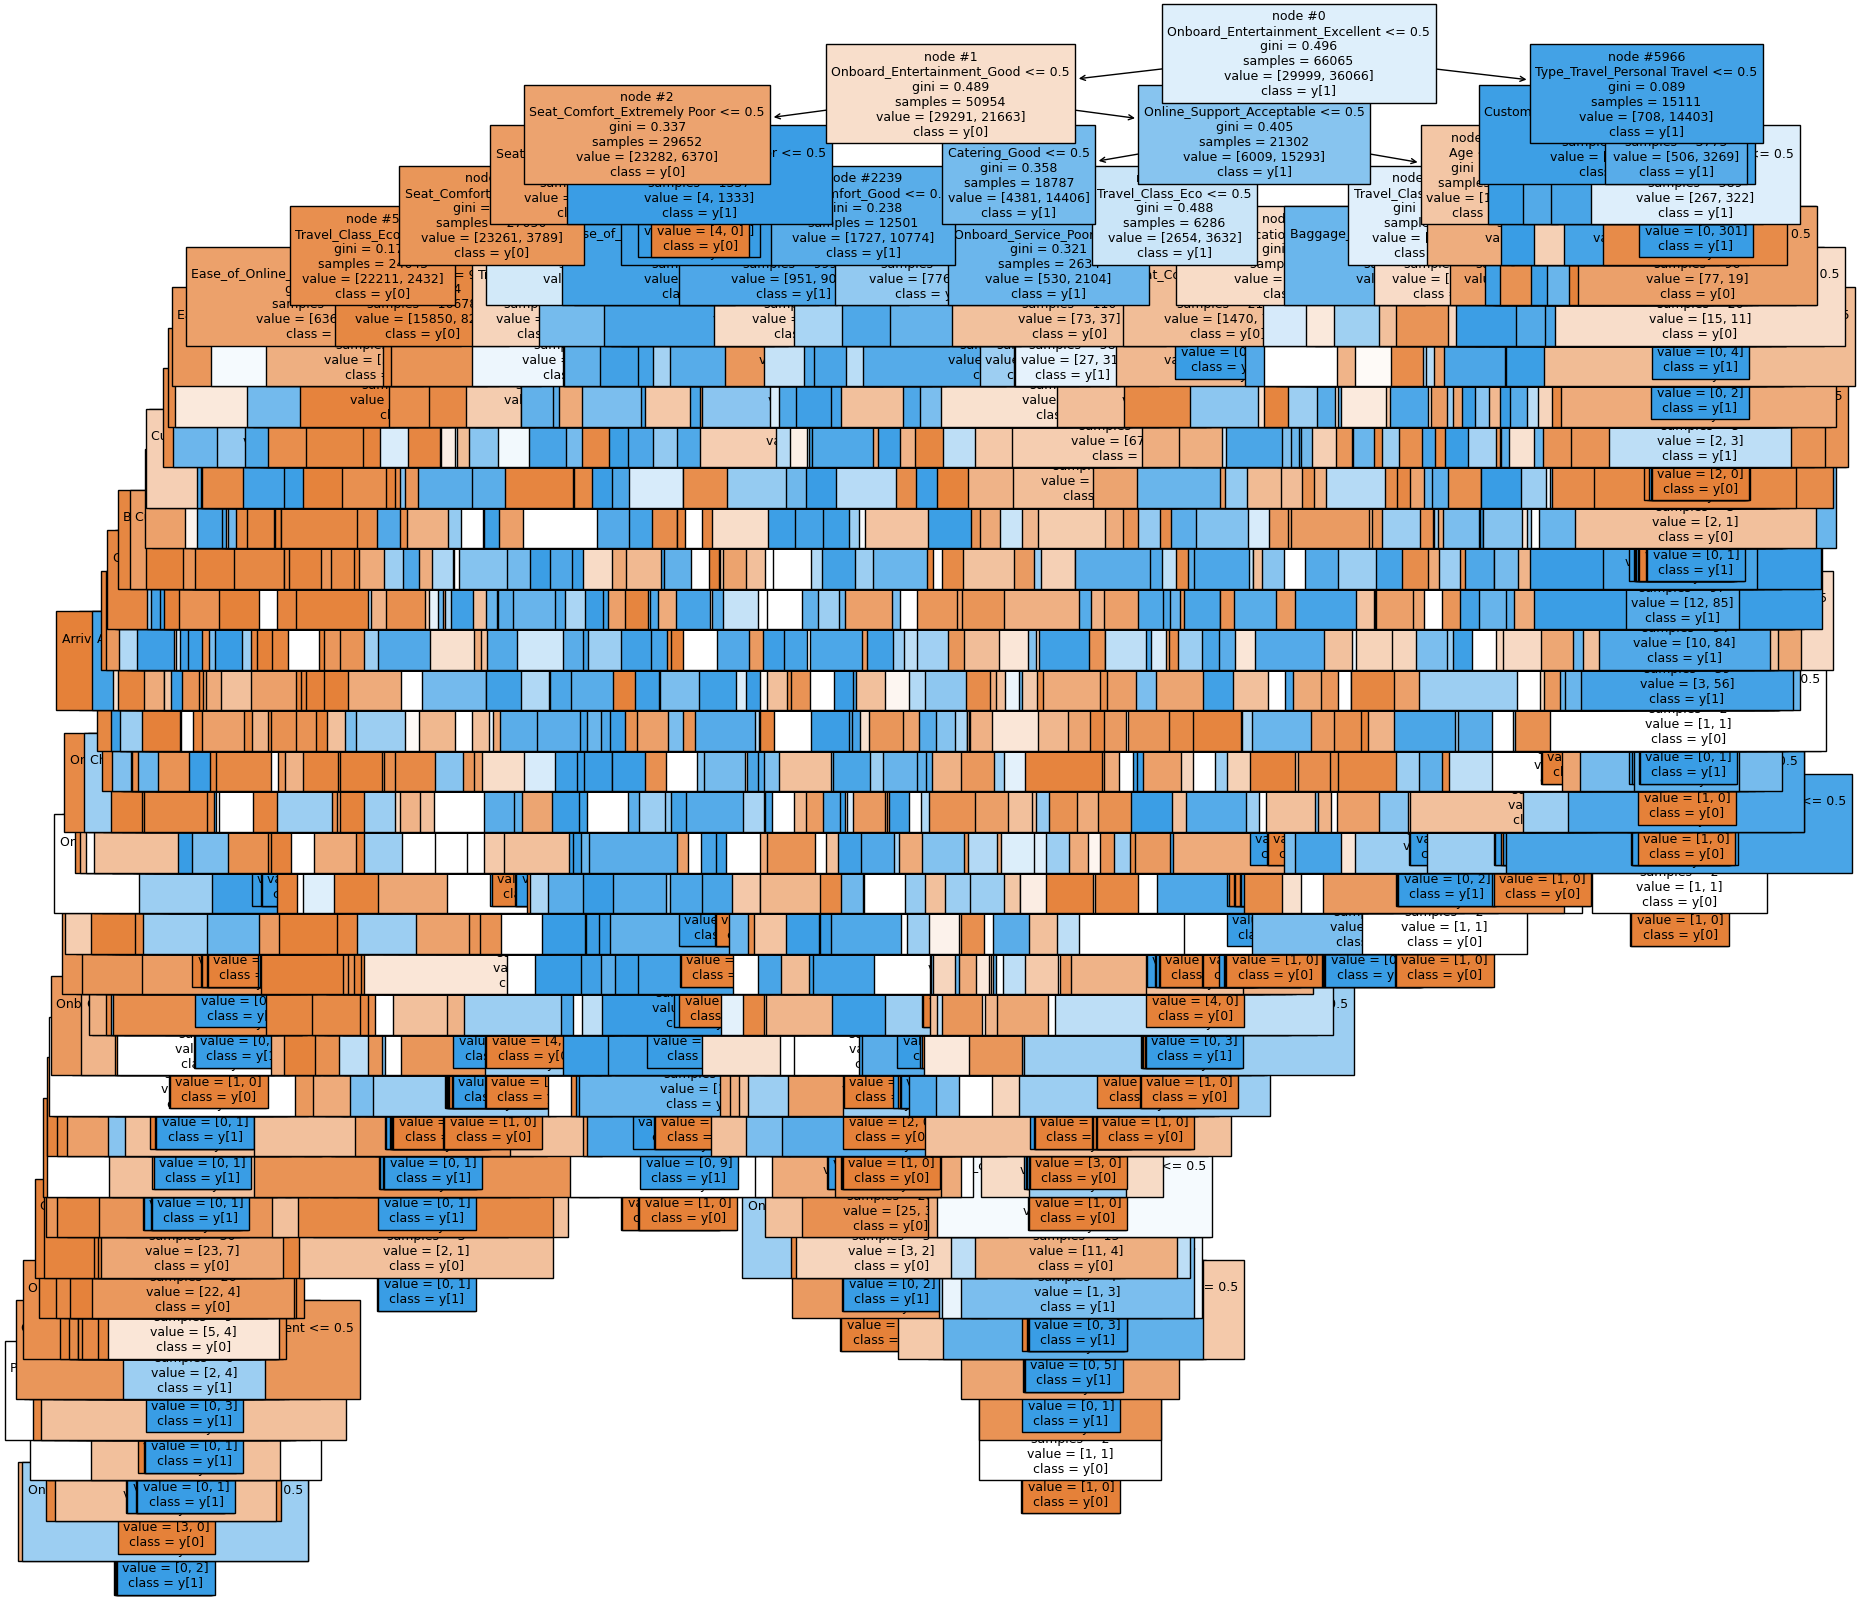

In [ ]:
def show_tree(d_tree):
    features = list(X.columns)

    plt.figure(figsize = (20, 20))

    tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

    plt.show()

show_tree(d_tree)

**Observations:**

- Results in perfect prediction.
- Most likely it is overfitting. Checking with test data.


**Checking the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12787
           1       0.94      0.94      0.94     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



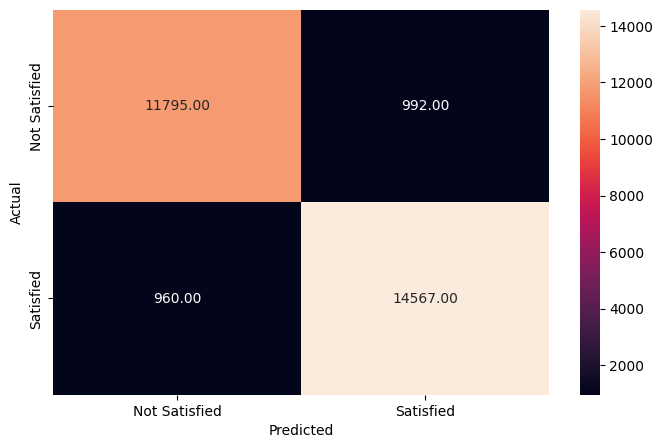

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Looking at the feature importance** of the tuned decision tree model

In [ ]:
# Importance of features in the tree building
def show_importance(d_tree, thresh_hold=0):
    importance = pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
    print (importance)
    print('0 importance features:')
    return importance[importance['Imp']<=thresh_hold]
to_drop = show_importance(d_tree, 0.001)
to_drop.index.astype(str).values

                                            Imp
Onboard_Entertainment_Excellent        0.198396
Onboard_Entertainment_Good             0.191581
Seat_Comfort_Excellent                 0.068451
Seat_Comfort_Extremely Poor            0.055243
Seat_Comfort_Good                      0.038264
...                                         ...
Onboard_Service_Extremely Poor         0.000000
Cleanliness_Extremely Poor             0.000000
Online_Support_Extremely Poor          0.000000
Ease_of_Online_Booking_Extremely Poor  0.000000
CheckIn_Service_Extremely Poor         0.000000

[94 rows x 1 columns]
0 importance features:


array(['Onboard_Entertainment_Acceptable', 'Catering_Needs Improvement',
       'Onboard_Entertainment_Needs Improvement',
       'Catering_Extremely Poor', 'Legroom_Extremely Poor',
       'Catering_Poor', 'Online_Boarding_Extremely Poor',
       'Onboard_Wifi_Service_Extremely Poor',
       'Onboard_Entertainment_Extremely Poor',
       'Platform_Location_Very Inconvenient',
       'Onboard_Service_Extremely Poor', 'Cleanliness_Extremely Poor',
       'Online_Support_Extremely Poor',
       'Ease_of_Online_Booking_Extremely Poor',
       'CheckIn_Service_Extremely Poor'], dtype=object)

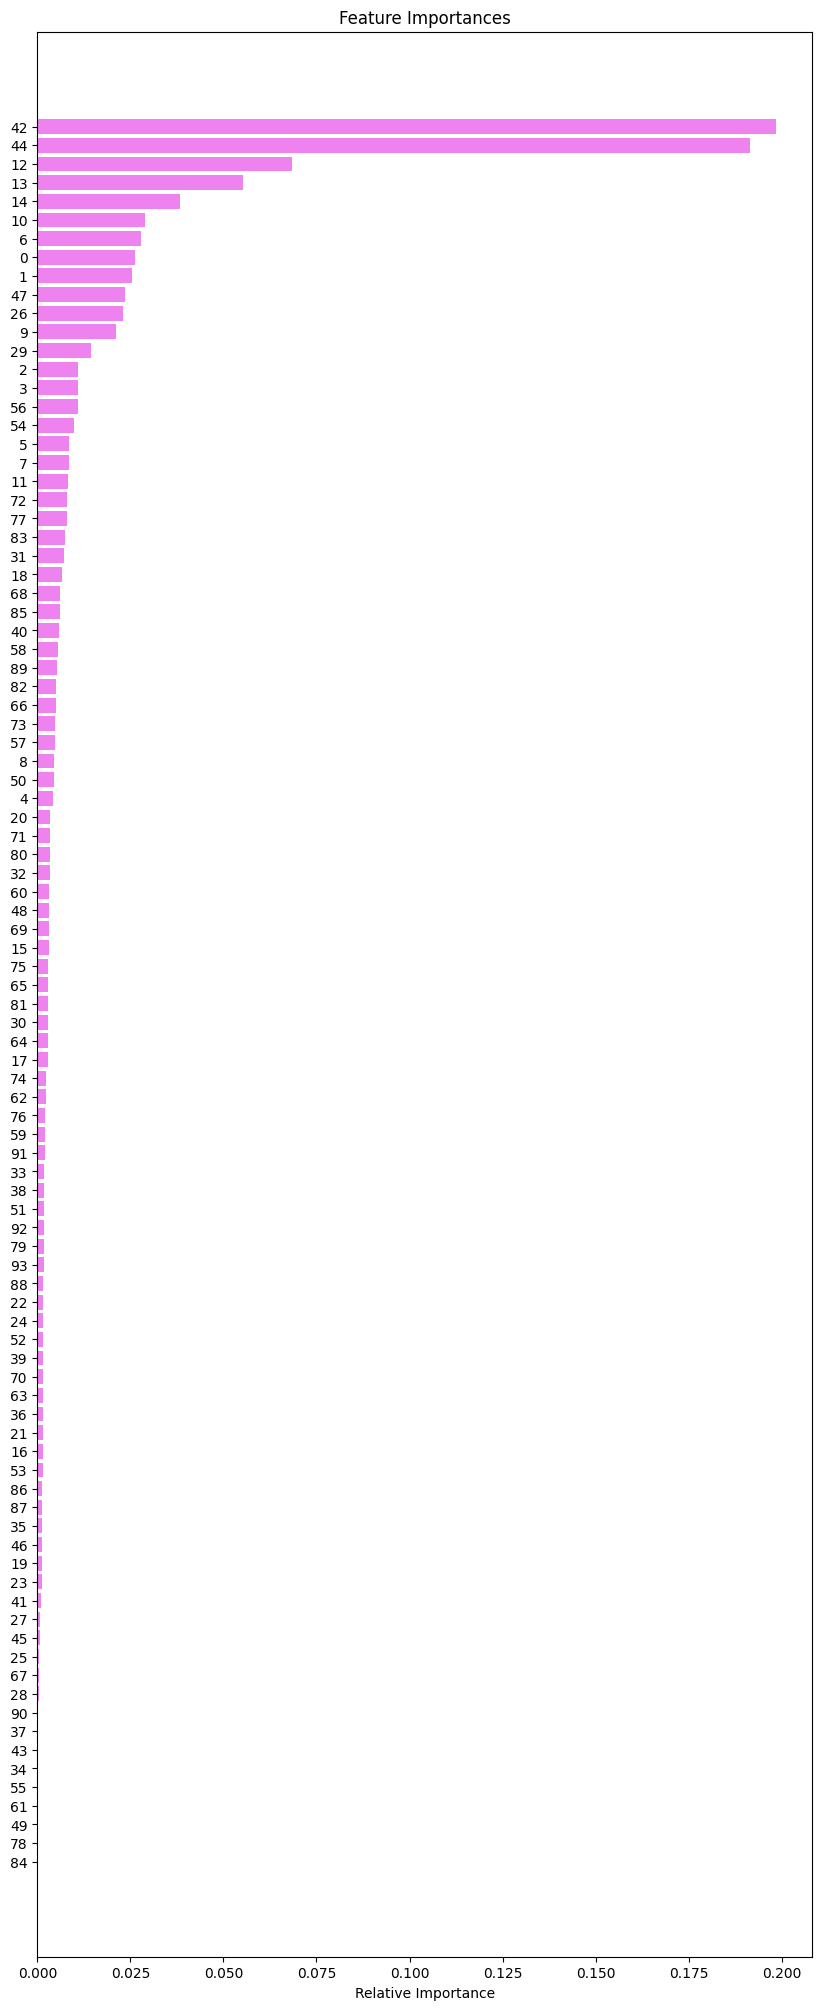

In [ ]:
# Plotting the feature importance
def plot_importance(d_tree):
    importances = d_tree.feature_importances_

    indices = (np.argsort(importances))

    plt.figure(figsize = (10, 25))

    plt.title('Feature Importances')

    plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

    plt.yticks(range(len(indices)), indices)

    plt.xlabel('Relative Importance')

    plt.show()

plot_importance(d_tree)

**Observations:**

- Performance is pretty good with 94%.
- 5 features are most important

**Trying hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. Will tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

Setting the class_weight hyperparameter with the value equal to {0: 0.454083, 1: 0.545917} which is approximately the opposite of the imbalance in the original data.

**Defines "1" as the important class here.**

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.454083, 1: 0.545917})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2, 3, 5, 10, 20, 25,50]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.454083, 1: 0.545917}, max_depth=9,
                       min_samples_leaf=50, random_state=7)

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree_tuned =  DecisionTreeClassifier(class_weight={0: 0.454083, 1: 0.545917}, max_depth=9, min_samples_leaf=25, random_state=7)

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.454083, 1: 0.545917}, max_depth=9,
                       min_samples_leaf=25, random_state=7)

The model is tuned, and the tuned model is fit on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     29999
           1       0.92      0.93      0.93     36066

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



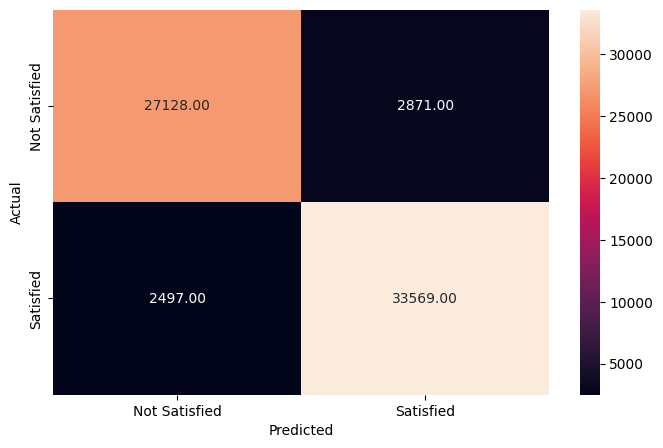

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**

- The training accuracy dropped after tunning.

**Checking the model performance on the testing data**

---



              precision    recall  f1-score   support

           0       0.91      0.90      0.91     12787
           1       0.92      0.93      0.92     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



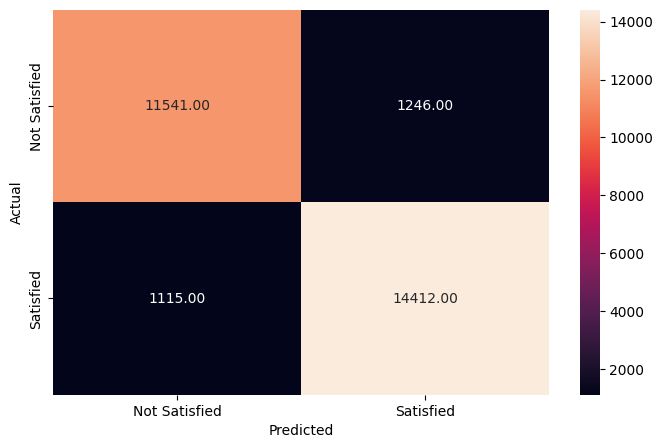

In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**

- The performance for training and testing are both worse.
- Exploring other options.

**Let's visualize the tuned decision tree** and observe the decision rules:

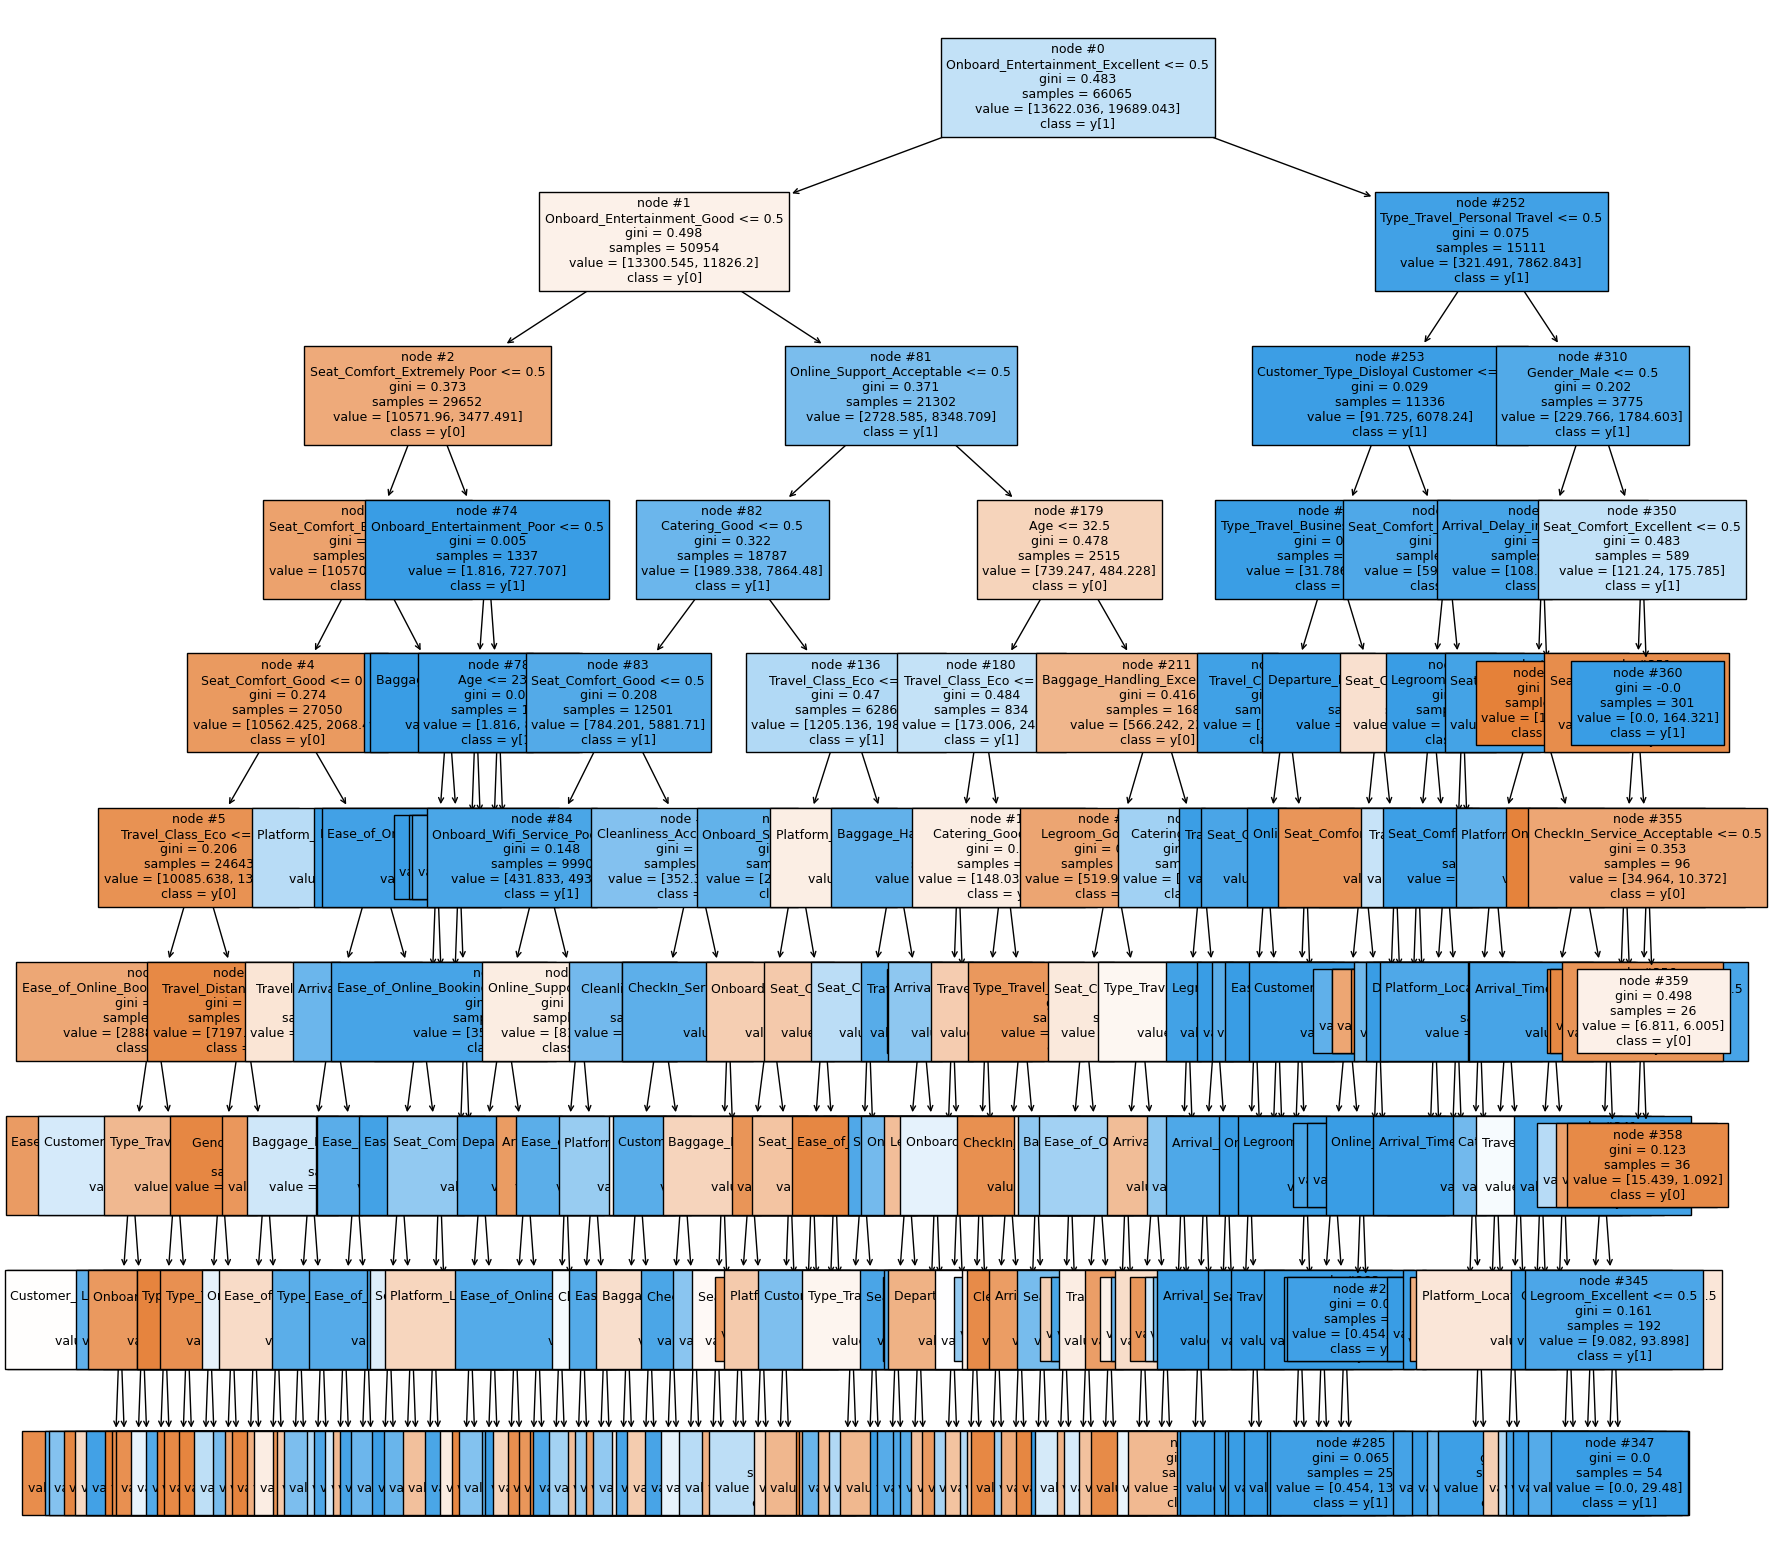

In [ ]:
show_tree(d_tree_tuned)

In [ ]:
to_drop = show_importance(d_tree_tuned, 0.001)
to_drop.index.astype(str).values

                                      Imp
Onboard_Entertainment_Good       0.260803
Onboard_Entertainment_Excellent  0.243671
Seat_Comfort_Excellent           0.090042
Seat_Comfort_Extremely Poor      0.073435
Seat_Comfort_Good                0.053171
...                                   ...
Onboard_Service_Acceptable       0.000000
Catering_Needs Improvement       0.000000
Onboard_Service_Extremely Poor   0.000000
Onboard_Service_Good             0.000000
Online_Boarding_Poor             0.000000

[94 rows x 1 columns]
0 importance features:


array(['Cleanliness_Excellent', 'CheckIn_Service_Poor',
       'Arrival_Time_Convenient_Good', 'Onboard_Entertainment_Poor',
       'Baggage_Handling_Poor', 'Arrival_Time_Convenient_Excellent',
       'Baggage_Handling_Acceptable', 'Onboard_Wifi_Service_Good',
       'Legroom_Needs Improvement', 'Departure_Delay_in_Mins',
       'Ease_of_Online_Booking_Acceptable', 'CheckIn_Service_Acceptable',
       'Online_Boarding_Acceptable', 'Catering_Excellent',
       'Onboard_Wifi_Service_Acceptable',
       'Arrival_Time_Convenient_Acceptable', 'Online_Support_Excellent',
       'Customer_Type_Loyal Customer',
       'Online_Boarding_Needs Improvement',
       'CheckIn_Service_Extremely Poor', 'CheckIn_Service_Good',
       'Cleanliness_Extremely Poor', 'Cleanliness_Poor',
       'Online_Boarding_Extremely Poor',
       'Baggage_Handling_Needs Improvement', 'Online_Boarding_Good',
       'Cleanliness_Needs Improvement', 'Legroom_Poor',
       'Seat_Comfort_Poor', 'Onboard_Service_Excellent',


**Observations:**

- Onboard entainment is the most predictive variable, which matches the observation from the heatmap.

**Let's look at the feature importance** of the tuned decision tree model

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **With respect to whether a lead will be converted, the other factors have little to no impact**.

Now, a random forest classifier.

### **Random Forest Classifier**

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7, criterion='entropy')

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



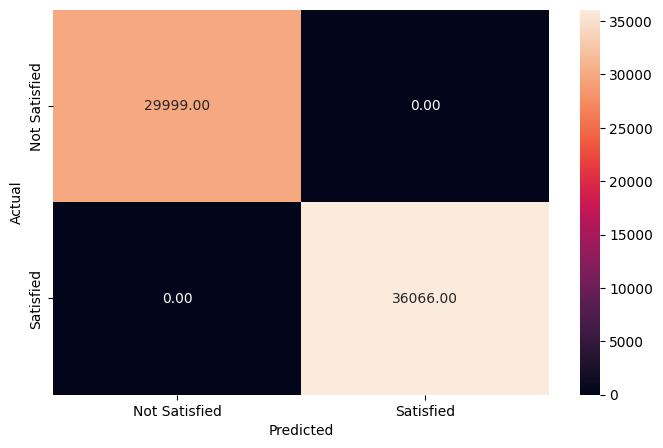

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**

- A perfect prediction.
- Most likely it is overfitting. Checking with test data.

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



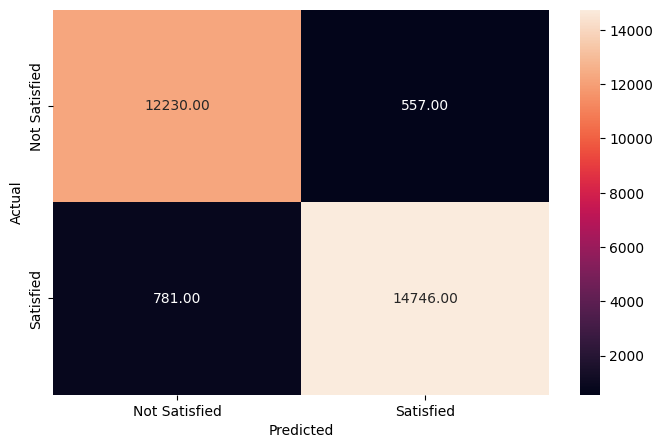

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

In [ ]:
to_drop = show_importance(rf_estimator, 0.001)
to_drop = to_drop.index.astype(str).values
X_train1 = X_train.drop(to_drop, axis=1)

                                              Imp
Onboard_Entertainment_Excellent      7.228899e-02
Seat_Comfort_Excellent               5.964420e-02
Travel_Class_Eco                     3.626638e-02
Onboard_Entertainment_Acceptable     3.332774e-02
Travel_Distance                      2.864688e-02
...                                           ...
Platform_Location_Very Inconvenient  1.272456e-05
Cleanliness_Extremely Poor           5.190975e-06
Onboard_Service_Extremely Poor       4.252273e-06
CheckIn_Service_Extremely Poor       3.954833e-06
Online_Support_Extremely Poor        2.648217e-07

[94 rows x 1 columns]
0 importance features:


**Observations:**

- Performance improved by 1% point.
- still overfitting.

### **Train again with Random Forest**

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator1 = RandomForestClassifier(random_state=7, criterion='entropy')

rf_estimator1.fit(X_train1, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



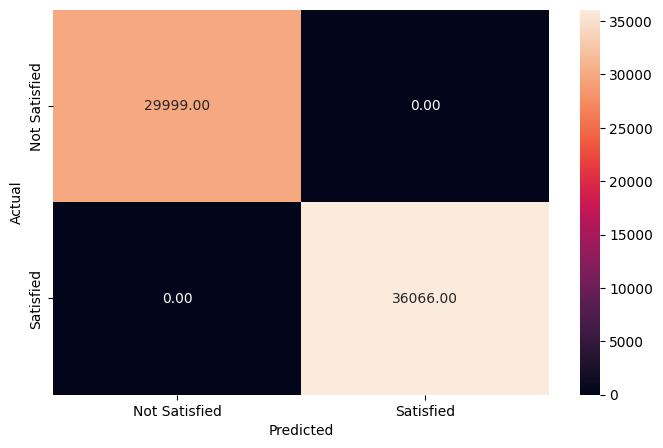

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



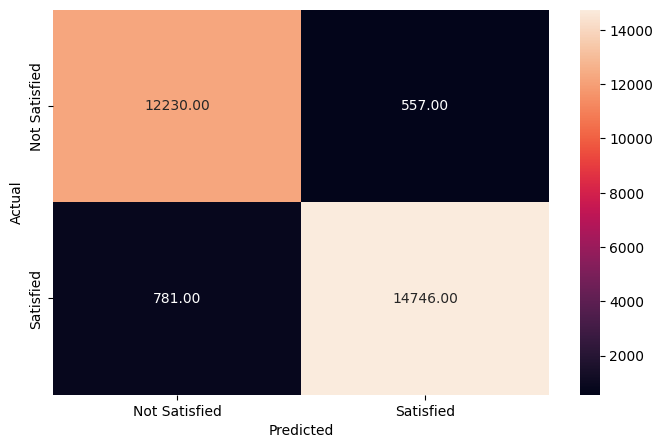

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

### **Encode test data**

In [ ]:
X_train['CheckIn_Service_Extremely Poor']

16280    0
65782    0
92958    0
15276    0
64291    0
        ..
21440    0
73349    0
50057    0
5192     0
77708    0
Name: CheckIn_Service_Extremely Poor, Length: 66065, dtype: uint8

In [ ]:
pip install dash

In [ ]:
pip install lightgbm

In [ ]:
pip install catboost

In [ ]:
pip install xgboost

## I tried a few methods here, but after extensive research, found CatBoost

In [ ]:
import plotly.express as px
#import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from scipy import stats

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
X_submit = pd.get_dummies(test, drop_first = True)
X_submit = X_submit.drop(['ID', 'Seat_Class_Ordinary'], axis=1)
X_submit['CheckIn_Service_Extremely Poor'] = 0
X_submit['Cleanliness_Extremely Poor'] = 0
X_submit['Onboard_Service_Extremely Poor'] = 0
X_submit['Online_Support_Extremely Poor'] = 0
X_submit['Platform_Location_Very Inconvenient'] = 0
X_submit = X_submit[X_train.columns]

In [ ]:
# Checking performance on the testing data
def generate_submission(model, out_file='submission.csv'):
    predictions = model.predict(X_submit)
    predictions
    submission = pd.concat([test, pd.DataFrame(predictions, columns=['Overall_Experience'])], axis=1)
    submission = submission[['ID', 'Overall_Experience']]
    submission.to_csv(out_file, index=False)
generate_submission(rf_estimator)

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    ConfusionMatrixDisplay(model)#, X_test, y_test

    return model, roc_auc

In [ ]:
params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

ROC_AUC = 0.9516143467201277
              precision    recall  f1-score   support

           0    0.94028   0.95308   0.94664     12787
           1    0.96092   0.95015   0.95551     15527

    accuracy                        0.95147     28314
   macro avg    0.95060   0.95161   0.95107     28314
weighted avg    0.95160   0.95147   0.95150     28314







# CatBoost seems to have an extra edge

In [ ]:
#params_cb ={}
#model_cb,
model_cb = cb.CatBoostClassifier(max_depth=9,learning_rate=0.05)
roc_auc_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

ROC_AUC = 0.9584963463140811
              precision    recall  f1-score   support

           0    0.94575   0.96246   0.95403     12787
           1    0.96863   0.95453   0.96153     15527

    accuracy                        0.95811     28314
   macro avg    0.95719   0.95850   0.95778     28314
weighted avg    0.95830   0.95811   0.95814     28314



              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12787
           1       0.97      0.95      0.96     15527

    accuracy                           0.96     28314
   macro avg       0.96      0.96      0.96     28314
weighted avg       0.96      0.96      0.96     28314



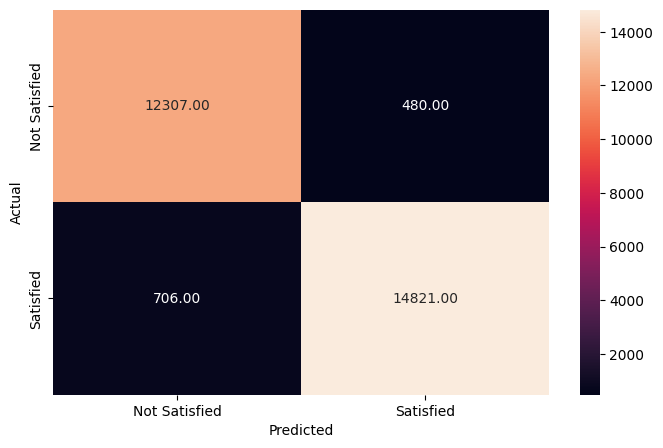

In [ ]:
# Checking performance on the testing data
y_pred_test3 = model_cb.predict(X_test)

metrics_score(y_test, y_pred_test3)

In [ ]:
#generate_submission(model_cb,'submission.csv') #when competing